# **CSI 382 - Data Mining and Knowledge Discovery**

# **Lab 9- Association Rules**

Affinity analysis is the study of attributes or characteristics that “go together.”
Methods for affinity analysis, also known as market basket analysis, seek to uncover associations among these attributes; that is, it seeks to uncover rules for
quantifying the relationship between two or more attributes. Association rules
take the form “If antecedent, then consequent,” along with a measure of the support and confidence associated with the rule.



# **Installing packages and importing libraries**

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Mount with Drive:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [50]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/19. occupancy_data.csv',header=None)

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 20561 rows and 8 columns.


In [51]:
df.head()

,0,1,2,3,4,5,6,7
0,ID,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,1,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529,1
2,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065,1
3,3,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199,1
4,4,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175,1


In [52]:
df=df.drop(columns=[0,1],axis=1)

In [54]:
df.head(3)

,2,3,4,5,6,7
0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.272,426,721.25,0.00479298817650529,1
2,23.15,27.2675,429.5,714,0.00478344094931065,1


# **Dataset Visualization**


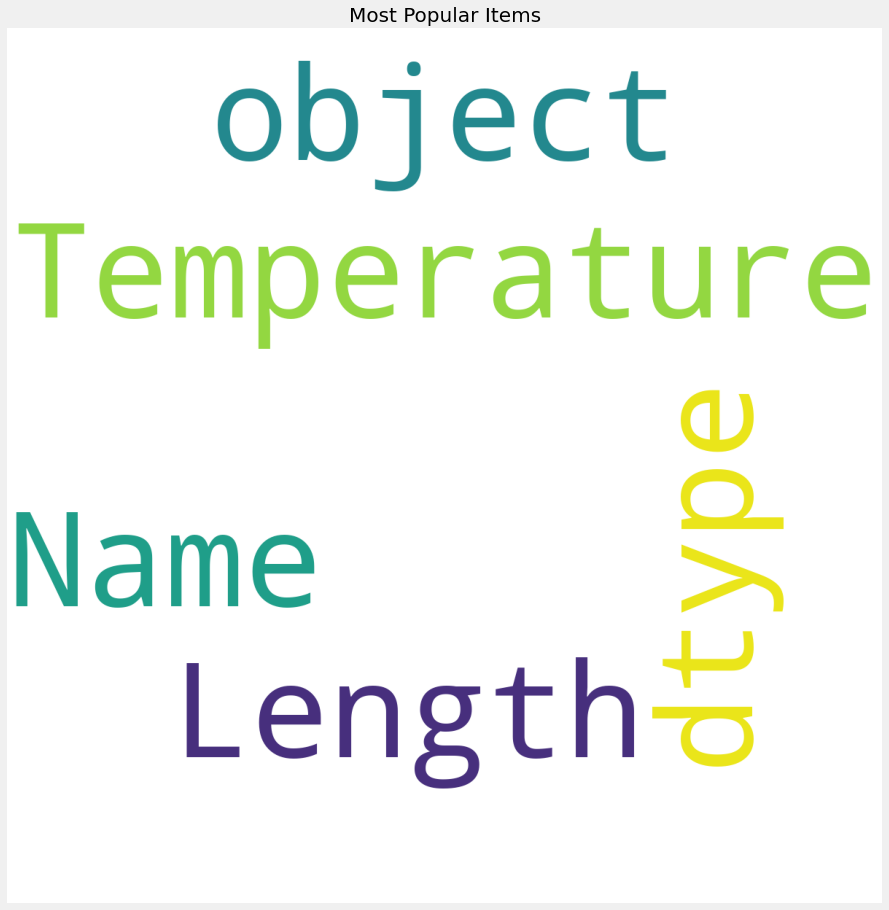

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 200).generate(str(df[2]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

The bigger words in the wordcloud depicts the most popular selling items in the supermarket.

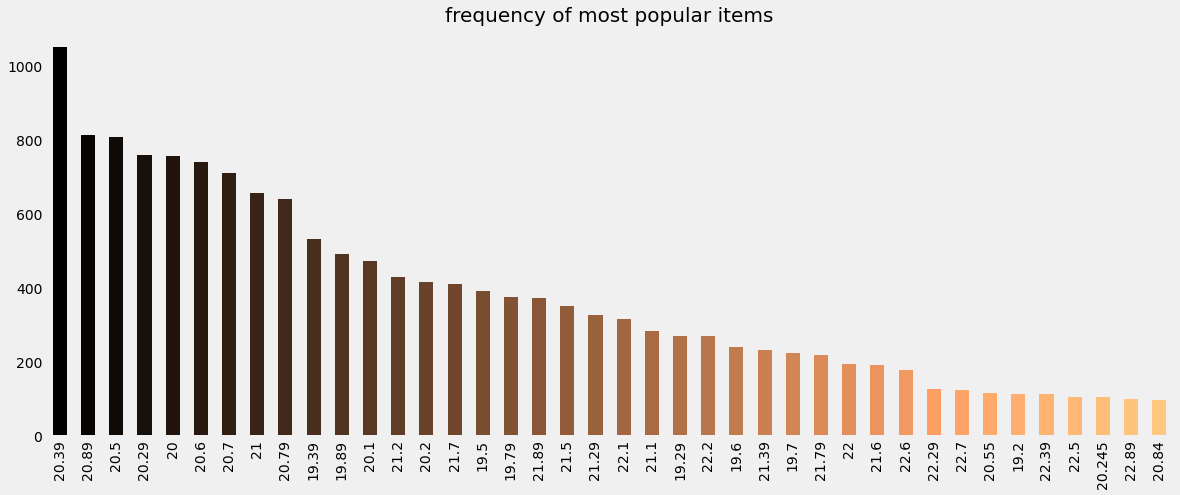

In [56]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[2].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Let's see a treemap implementation of the frequency of the data.

In [57]:
y = df[2].value_counts().head(40).to_frame()
y.index

Index(['20.39', '20.89', '20.5', '20.29', '20', '20.6', '20.7', '21', '20.79',
       '19.39', '19.89', '20.1', '21.2', '20.2', '21.7', '19.5', '19.79',
       '21.89', '21.5', '21.29', '22.1', '21.1', '19.29', '22.2', '19.6',
       '21.39', '19.7', '21.79', '22', '21.6', '22.6', '22.29', '22.7',
       '20.55', '19.2', '22.39', '22.5', '20.245', '22.89', '20.84'],
      dtype='object')

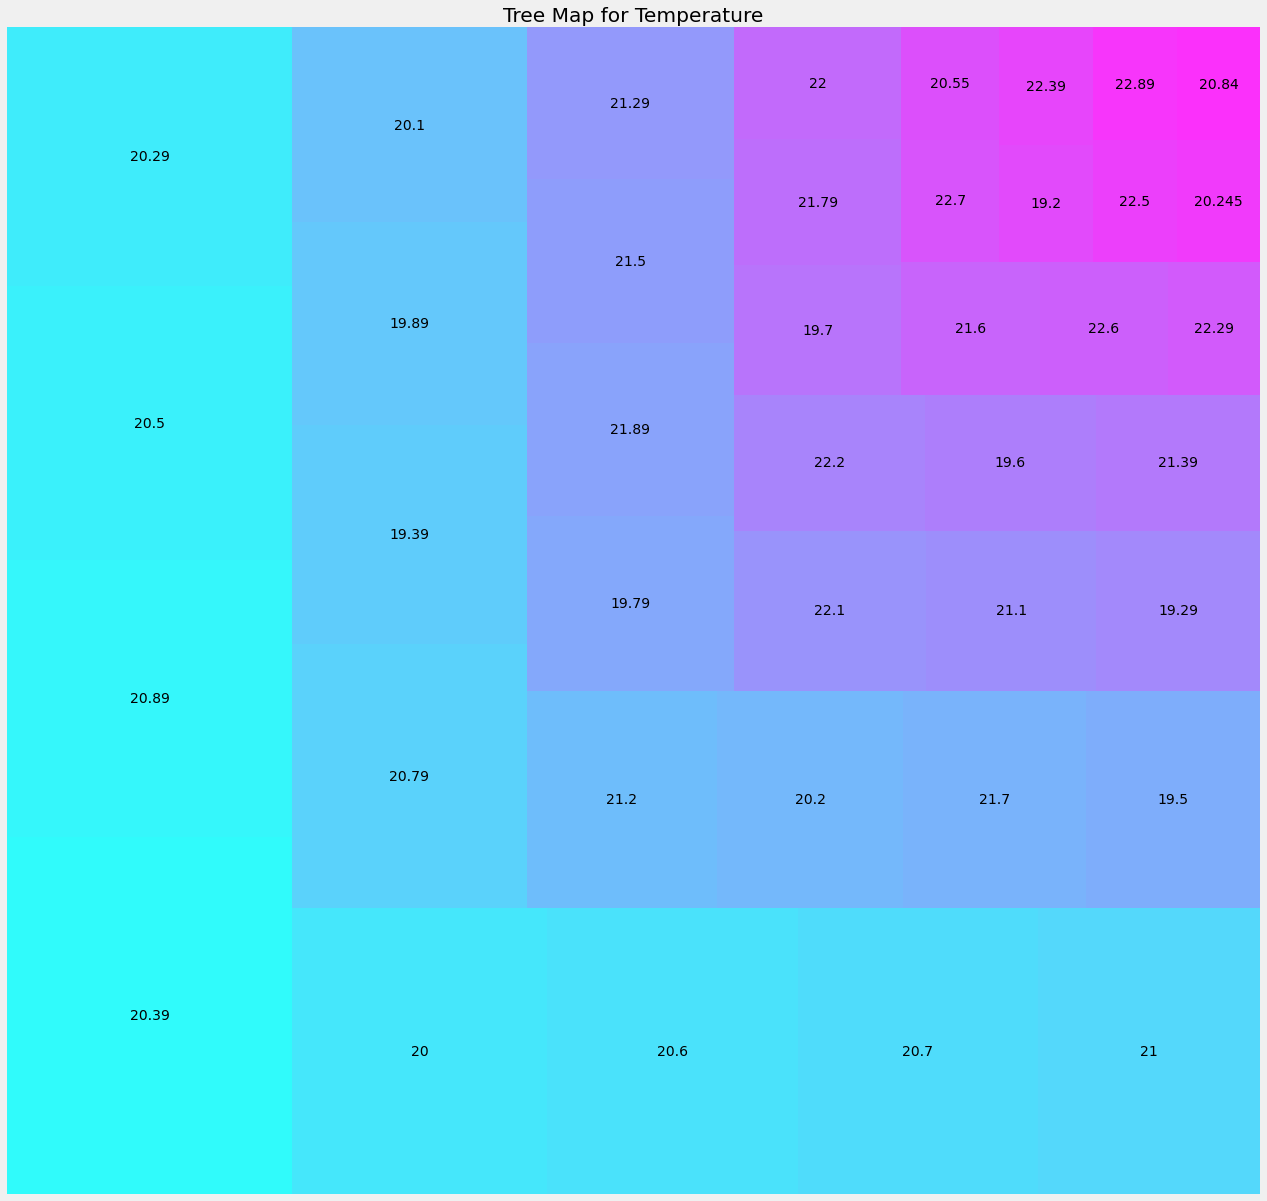

In [58]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 40))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Temperature')
plt.axis('off')
plt.show()

Now we can check the first choices of the customers for all data. 

In [63]:
df['food'] = 'Resource'
food = df.truncate(before = -1, after = 15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 2, edge_attr = True)

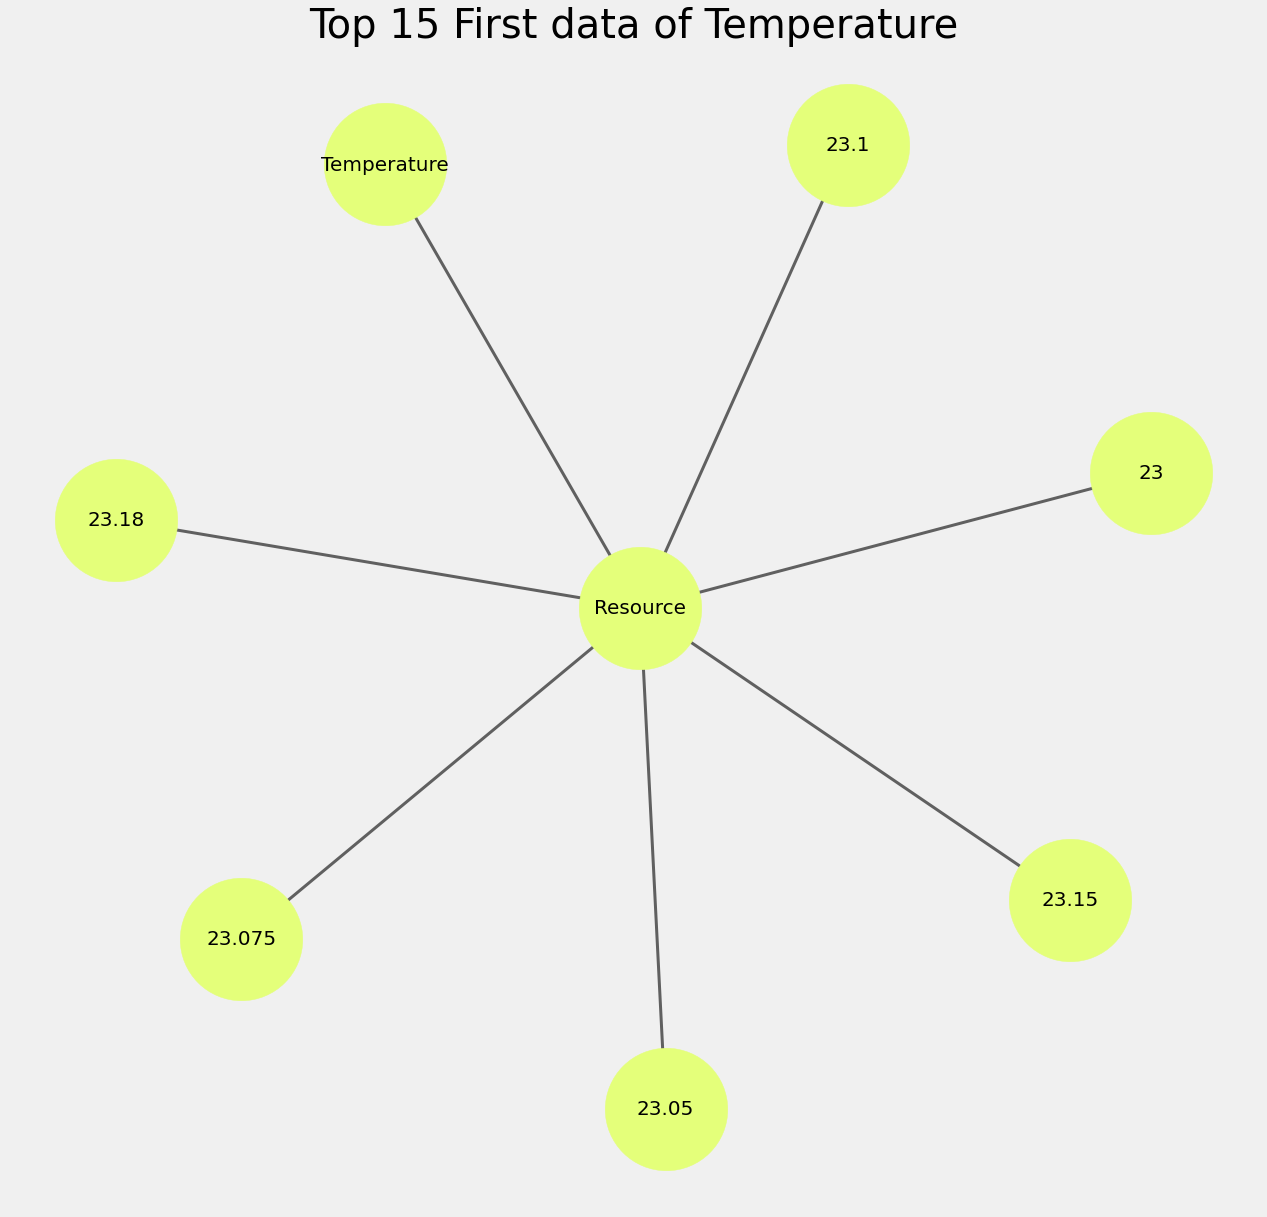

In [64]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First data of Temperature', fontsize = 40)
plt.show()

Now we can check the second choices of the customers for all data. 

In [65]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 3, edge_attr = True)

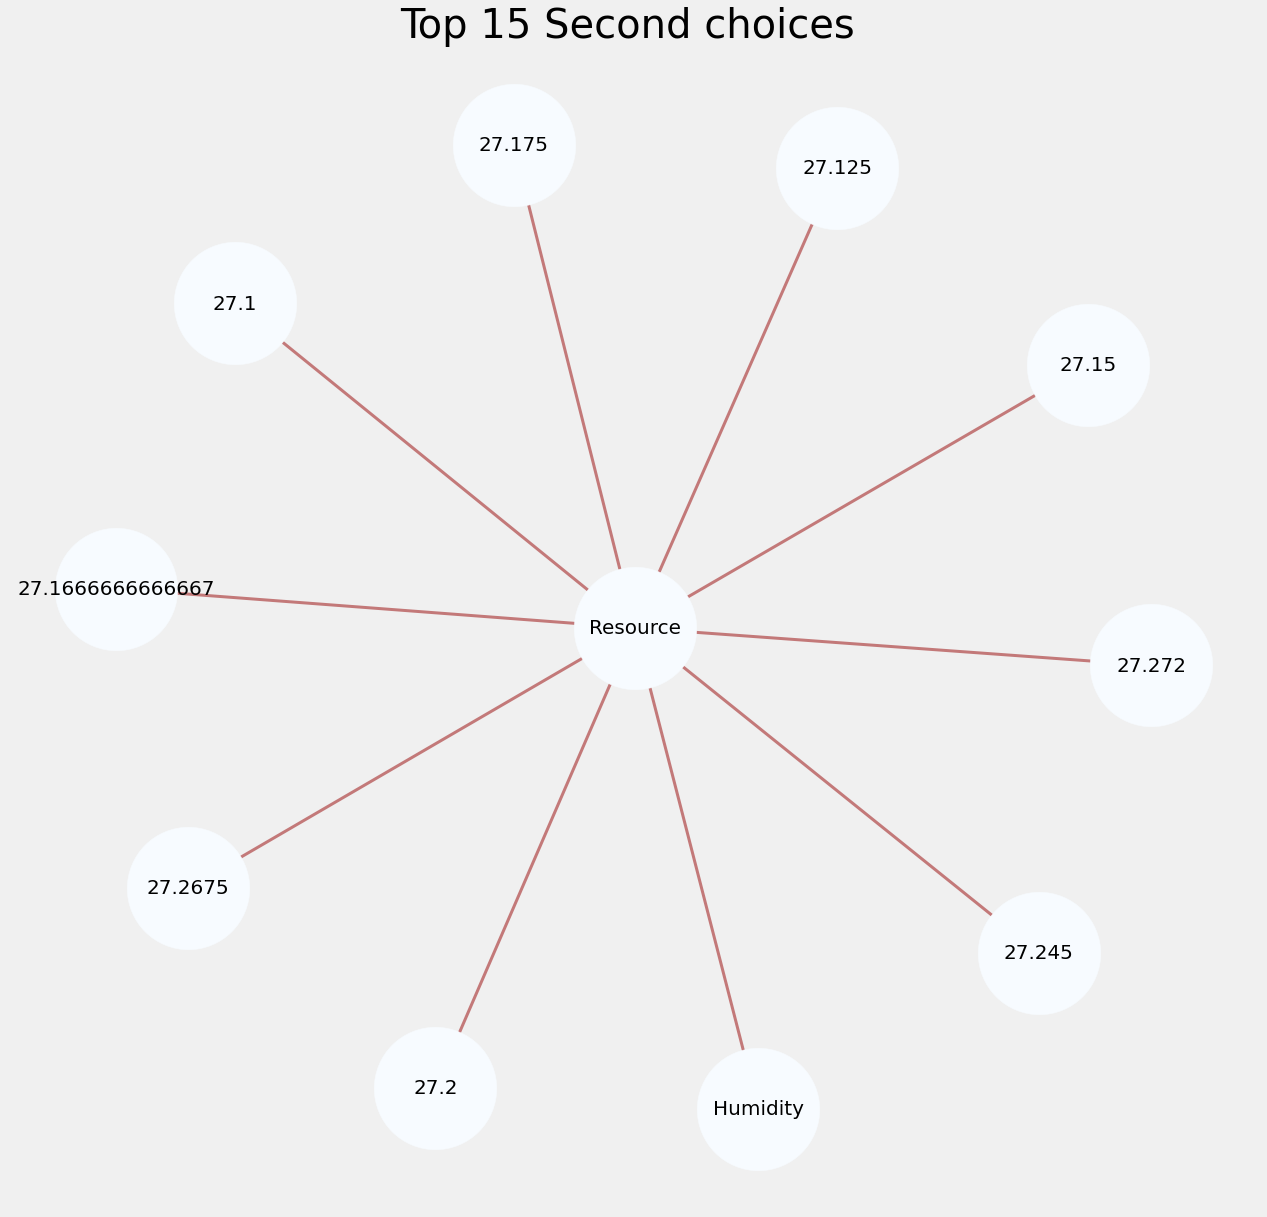

In [66]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second choices ', fontsize = 40)
plt.show()

Now we can check the third choices of the customers for all data. 

In [67]:
df['thirdchoice'] = 'Third Choice'
thirdchoice = df.truncate(before = -1, after = 10)
thirdchoice = nx.from_pandas_edgelist(thirdchoice, source = 'food', target = 4, edge_attr = True)


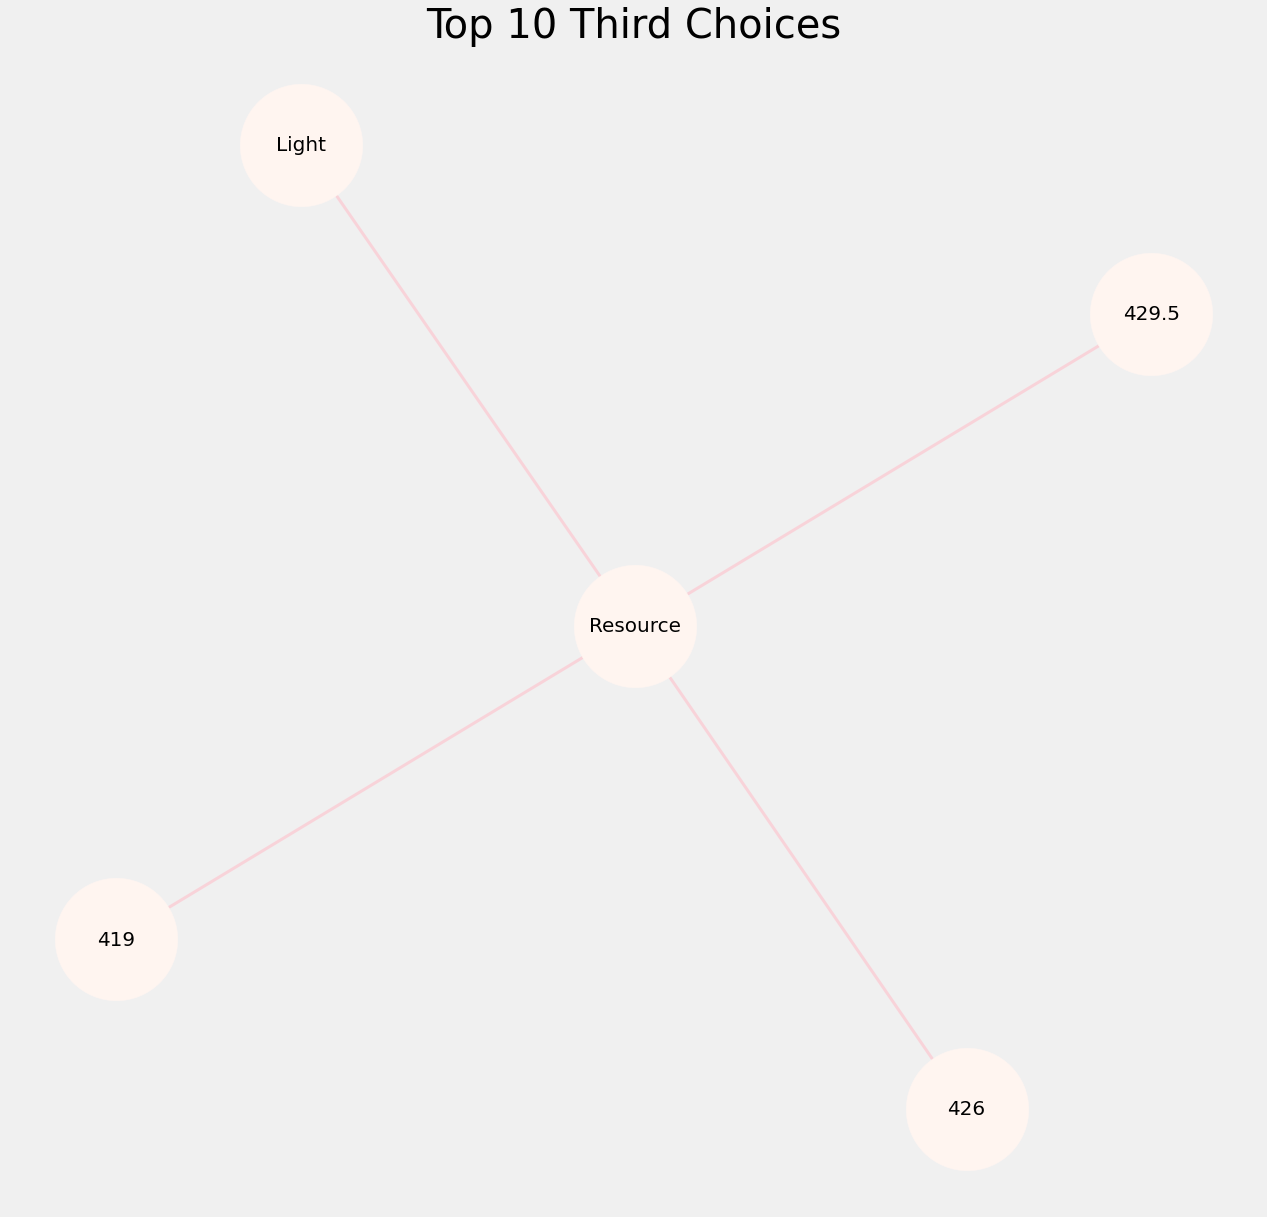

In [68]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(thirdchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(thirdchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(thirdchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(thirdchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()


# **Data Preprocessing**

In [71]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 20550):
    trans.append([str(df.values[i,j]) for j in range(0, 6)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(20550, 6)


In [72]:
trans[:,0:6]

array([['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
        'Occupancy'],
       ['23.18', '27.272', '426', '721.25', '0.00479298817650529', '1'],
       ['23.15', '27.2675', '429.5', '714', '0.00478344094931065', '1'],
       ...,
       ['20.79', '26.79', '10', '1450.5', '0.00406476689601859', '0'],
       ['20.84', '26.84', '12', '1446.5', '0.00408503869569835', '0'],
       ['20.79', '26.79', '14', '1444.66666666667',
        '0.00406476689601859', '0']], dtype='<U19')

In [73]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns = te.columns_)

# getting the shape of the data
df.shape

(20550, 18584)

In [74]:
df.head(10)

,0,0.00267412691390407,0.00267789158376215,0.00268180707239182,0.0026840113730721,0.00268436351878123,0.00268652086025527,0.00268707588122265,0.00268842007556158,0.00268904739802089,...,999.5,999.6,999.666666666667,999.75,CO2,Humidity,HumidityRatio,Light,Occupancy,Temperature
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Apriori Algorithm**

 Apriori algorithm finds the most frequent itemsets or elements in a transaction database and identifies association rules between the items just like the above-mentioned example.

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

**Support**:

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as the equation specified in the Lecture slides.

**Confidence**:

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.
**Lift**:

Lift is the ratio between the confidence and support.

**Strong Rules**

Analysts may prefer rules that have either high support or high confidence, and
usually both. Strong rules are those that meet or surpass certain minimum support and confidence criteria.


**Itemset**

An itemset is a set of items contained in $I$ , and a $k-itemset$ is an itemset containing
$k$ items. 

## **Finding Frequent itemsets**

In [75]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(df, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.769294,(0)
1,0.230706,(1)
2,0.010024,(14)
3,0.019805,(19.29)
4,0.032117,(19.39)
...,...,...
71,0.011192,"(1, 22.2)"
72,0.012409,"(1, 419)"
73,0.024234,"(433, 1)"
74,0.012360,"(1, 444)"


In [76]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.769294,(0),1
1,0.230706,(1),1
2,0.052457,(20.39),1
3,0.050560,"(0, 20.39)",2


In [77]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]


,support,itemsets,length
3,0.05056,"(0, 20.39)",2


In [82]:
# getting th item sets with length = 3 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01) ]


,support,itemsets,length


## Finding Association Rules

In [78]:
rules_mlxtend = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)
rules_mlxtend.sort_values(by=["support"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(20.39),0.769294,0.052457,0.05056,0.065722,1.252865,0.010204,1.014198
1,(20.39),(0),0.052457,0.769294,0.05056,0.963822,1.252865,0.010204,6.376939


In [ ]:
rules_mlxtend[ (rules_mlxtend['lift'] >= 1) & (rules_mlxtend['confidence'] >= 0.3) ].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(20.39),(0),0.052457,0.769294,0.05056,0.963822,1.252865,0.010204,6.376939


In [83]:
rules_mlxtend[ (rules_mlxtend['lift'] >= 1) & (rules_mlxtend['support'] >= 0.01) ].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(20.39),0.769294,0.052457,0.05056,0.065722,1.252865,0.010204,1.014198
1,(20.39),(0),0.052457,0.769294,0.05056,0.963822,1.252865,0.010204,6.376939
